In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv('/content/insurance_data - insurance_data.csv')

Insurance Dataset : https://docs.google.com/spreadsheets/d/1dAc3E4U-gBzihJ6HLM2kYVDAqQthdReg20zwwaplTW8/edit?usp=share_link

In [203]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


### Q-1: What is the probability distribution of age in the insurance dataset?

-- Find out using the KDE method

In [204]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth=3,kernel='gaussian')
age = df['age'].dropna().values.reshape(-1,1)
model.fit(age)

KernelDensity(bandwidth=3)

In [205]:
values = np.linspace(age.min(),age.max(),100)
values = values.reshape(-1,1)

In [206]:
age.max()

np.float64(60.0)

In [207]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

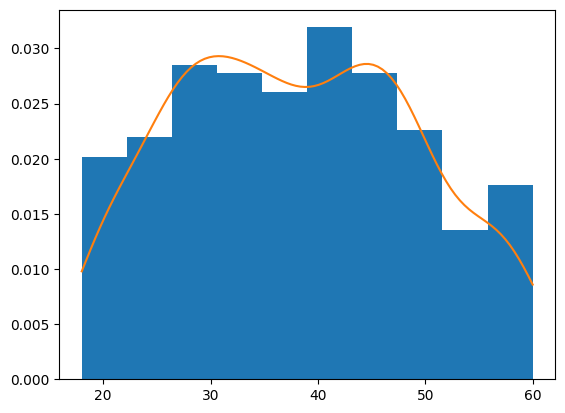

In [208]:
plt.hist(df['age'], density=True)
plt.plot(values[:],probabilities)

### Q-2: What is the probability of a patient having a BMI greater than 30?

In [209]:
df['bmi'].value_counts().sum()

np.int64(1340)

In [210]:
df[df['bmi'] > 30]['bmi'].value_counts().sum()/df['bmi'].value_counts().sum()

np.float64(0.5216417910447761)

### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

<Axes: xlabel='claim', ylabel='Count'>

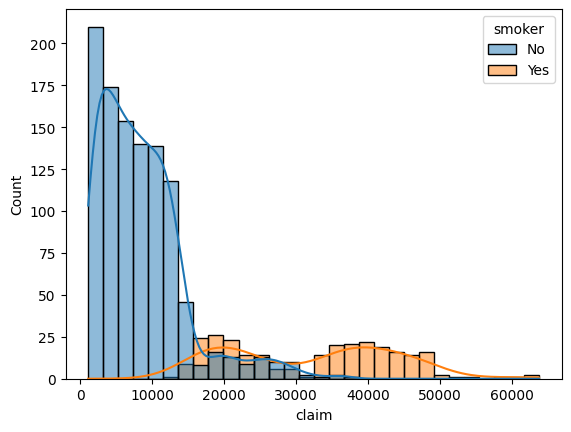

In [211]:
sns.histplot(df,x='claim',hue='smoker',kde='True')

### Q-4: Plot the 2D probability density plot of claim and age in the insurance dataset?

<Axes: xlabel='age', ylabel='claim'>

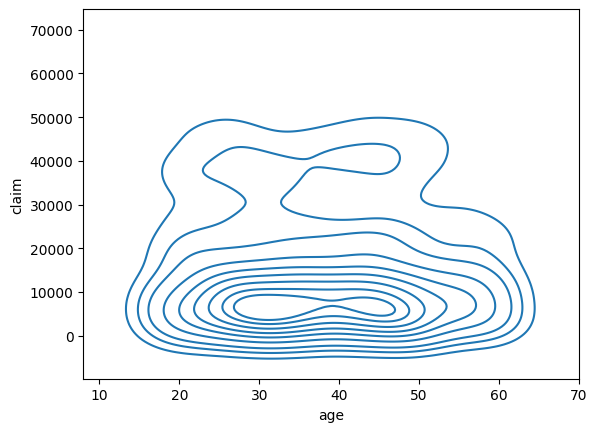

In [212]:
sns.kdeplot(df,x='age',y='claim')

### Q-5: How does the disribution of claim changes for different region? Plot density plot and note down the observations

<Axes: xlabel='claim', ylabel='Density'>

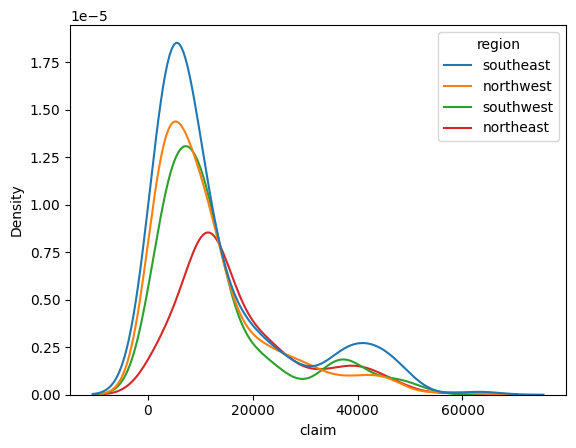

In [213]:
sns.kdeplot(df,x='claim',hue='region')

### Q6: Plot PDF and CDF of claim in insurance data

<Axes: xlabel='claim', ylabel='Count'>

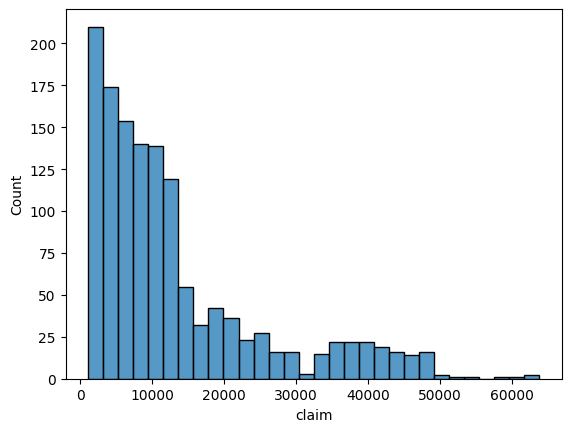

In [214]:
sns.histplot(df,x='claim')

In [226]:
model1 = KernelDensity(bandwidth=6,kernel='gaussian')
claim = df['claim'].values.reshape(-1,1)
model1.fit(claim)

KernelDensity(bandwidth=6)

In [227]:
values1 = np.linspace(claim.min(),claim.max(),100)
values1  = values1.reshape(-1,1)

In [228]:
probability = model1.score_samples(values1)
probability = np.exp(probability)

<Axes: xlabel='claim', ylabel='Density'>

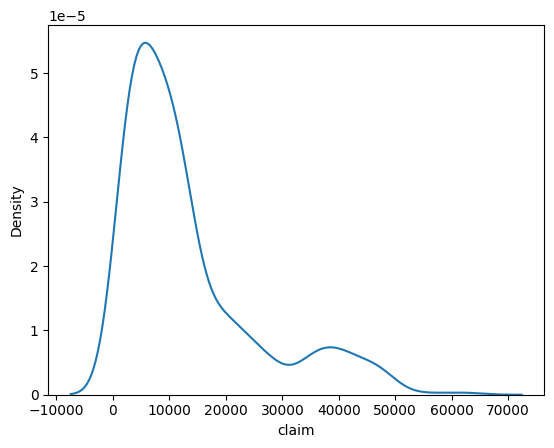

In [230]:
sns.kdeplot(df,x='claim')

<Axes: xlabel='claim', ylabel='Density'>

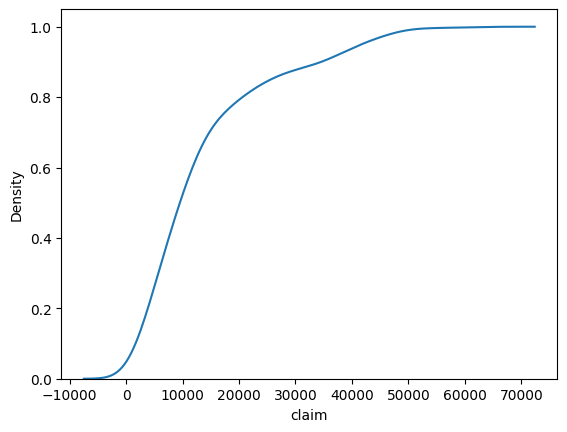

In [231]:
sns.kdeplot(df,x='claim',cumulative=True)

### Q-7: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5.

In [232]:
import random

In [238]:
l = []

In [265]:
def cdf(x):
  if x<0:
    return 0
  elif 0<=x<=1:
    return x**2
  elif x>1:
    return 1



In [266]:
def func(x):
  if 0<=x<=1:
    return 2*x
  else:
    return 0

sample = np.linspace(0,1,100)

In [268]:
y = pd.Series([cdf(value) for value in sample])

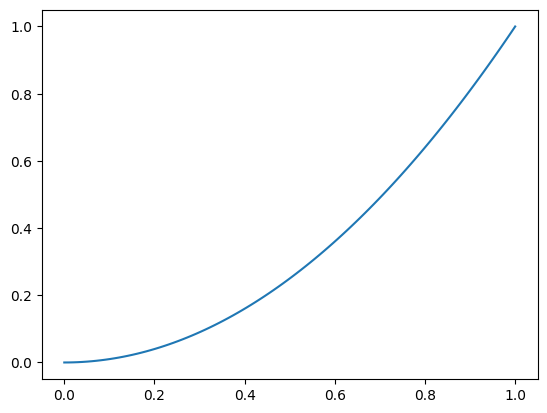

In [270]:
plt.plot(sample,y)

In [271]:
1-cdf(0.5)

0.75

### Q-8: In a manufacturing process, the thickness of a certain material is known to be normally distributed with a mean of 1.2 mm and a standard deviation of 0.05 mm. What is the probability density function of the thickness? Plot the PDF and use it to compute the probability that the thickness is between 1.1 mm and 1.3 mm.

In [286]:
mean = 1.2
std_dev= 0.05

def pdf(x,mean,std_dev):
  return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std_dev ** 2))

sample = np.linspace(1,1.4,100)



In [282]:
result = pd.Series([pdf(x,1.2,0.05)  for x in sample ])

In [283]:
from scipy.stats import norm


In [287]:
from scipy import integrate
integrate.quad(lambda x : pdf(x,mean,std_dev),1.1,1.3 )[0]

0.9544997361036409

In [279]:
norm.cdf(1.3,loc=1.2,scale=0.05) - norm.cdf(1.1,loc=1.2,scale=0.05)

np.float64(0.9544997361036416)

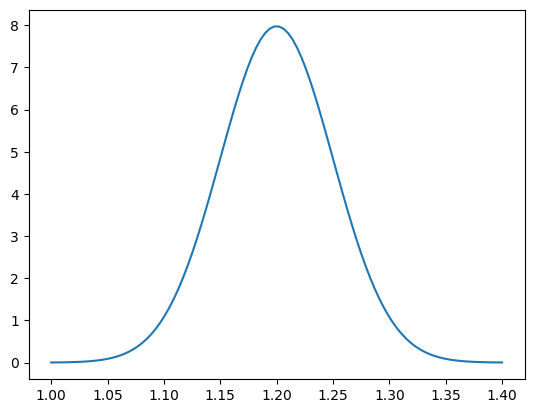

In [275]:
plt.plot(sample,result)

### Q-9 : A data scientist is investigating the distribution of customer ages in a retail store. She collects a sample of 100 ages and estimates the probability density function using kernel density estimation. What bandwidth should she choose to obtain the best estimate?

In [245]:
# scott rule
h = 1.06 * 12*(100**(-1/5))

In [246]:
h

5.0639232094404845